Unit 3 - Exercises

In [1]:
# Import libraries
import pandas as pd
import plotnine as pn

In [2]:
# Create DataFrame
athletes_data = pd.read_csv('./athlete_events.csv')

Ejercicio 1.a

Crear un gráfico de barras que muestre el número de medallas ganadas por los atletas de un China en cada deporte.

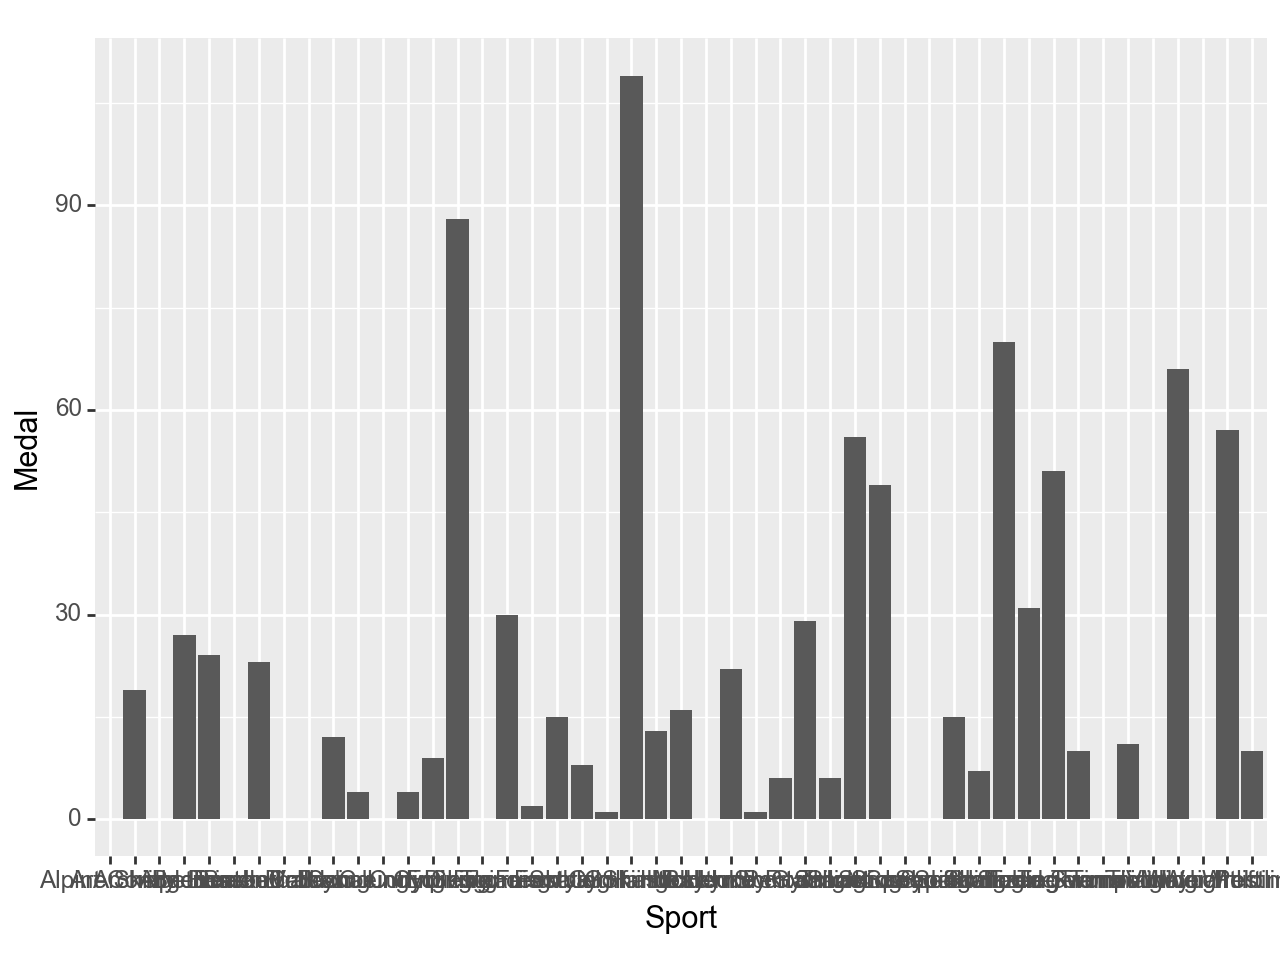

In [3]:
chinese_athletes = athletes_data[athletes_data["Team"] == "China"]
chinese_medals_count = chinese_athletes.groupby('Sport')["Medal"].count().reset_index()

# Create bar graph
graph = pn.ggplot(
    chinese_medals_count,
    pn.aes(**{"x": 'Sport', "y": 'Medal'}),
) + pn.geom_bar(stat='identity')

# Display graph
graph.draw()

Ejercicio 1.b

Modifica el gráfico anterior para que se diferencien las medallas cambiando el color según el tipo.

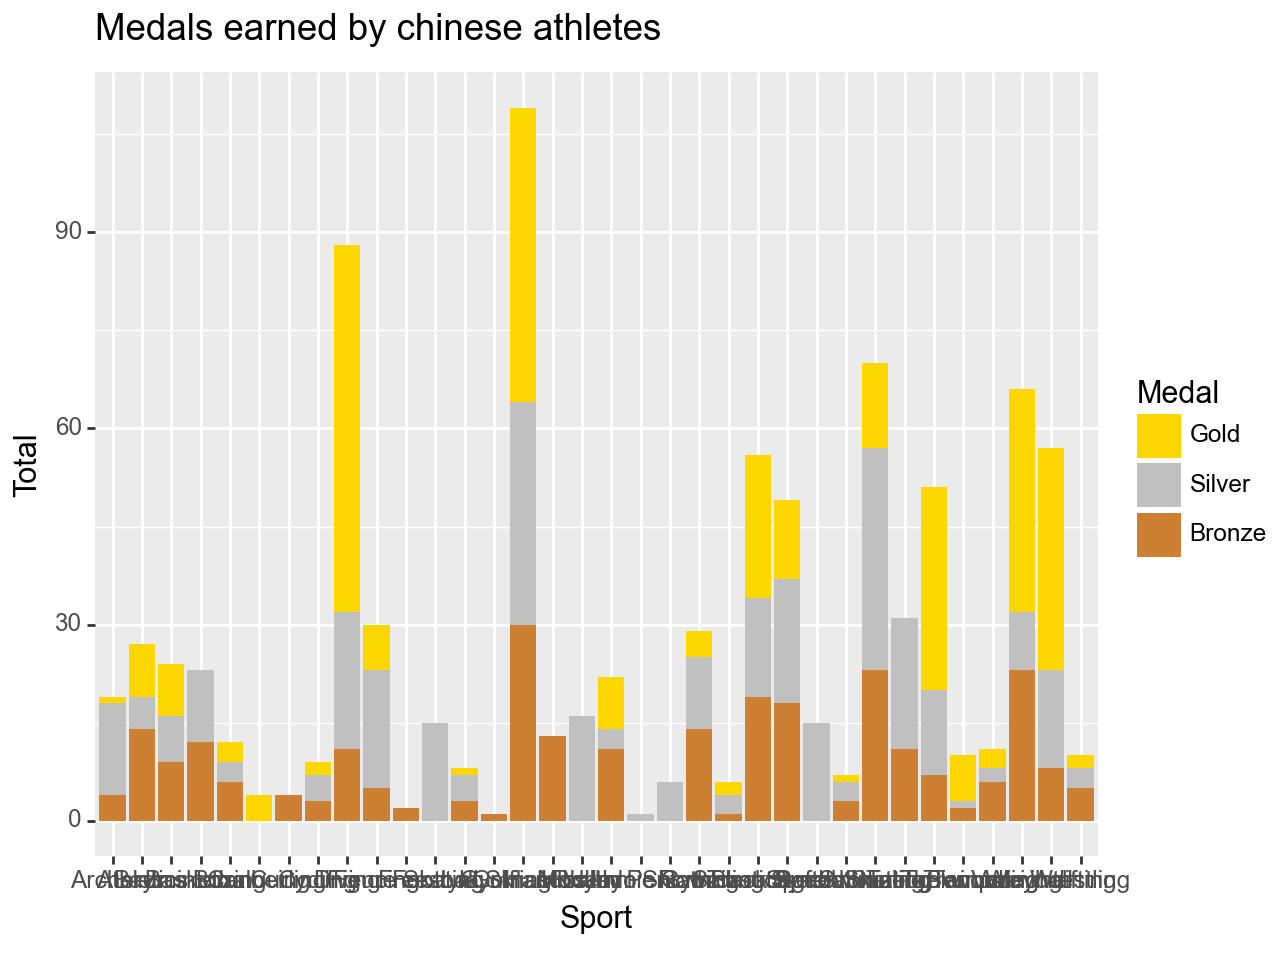

In [4]:
chinese_medals = chinese_athletes.groupby('Sport')["Medal"].value_counts().reset_index()
chinese_medals.rename(columns={'count': 'Total'}, inplace=True)
chinese_medals['Medal'] = pd.Categorical(chinese_medals['Medal'], categories=["Gold", "Silver", "Bronze"], ordered=True)

# Creamos el gráfico de barras
graph = (
        pn.ggplot(
            chinese_medals,
            pn.aes(**{"x": "Sport", "y": "Total", "fill": "Medal"}),
        )
        + pn.geom_col()
        + pn.ggtitle("Medals earned by chinese athletes")
        + pn.xlab("Sport")
        + pn.ylab("Total")
        + pn.scale_fill_manual(values={
    "Bronze": "#cd7f32",  # Bronze color
    "Gold": "#ffd700",  # Gold color
    "Silver": "#c0c0c0"  # Silver color
})
)

# Mostramos el gráfico
graph.draw()

Ejercicio 1.c

Averigua como rotar las etiquetas del eje x del gráfico anterior para que se muestren correctamente.

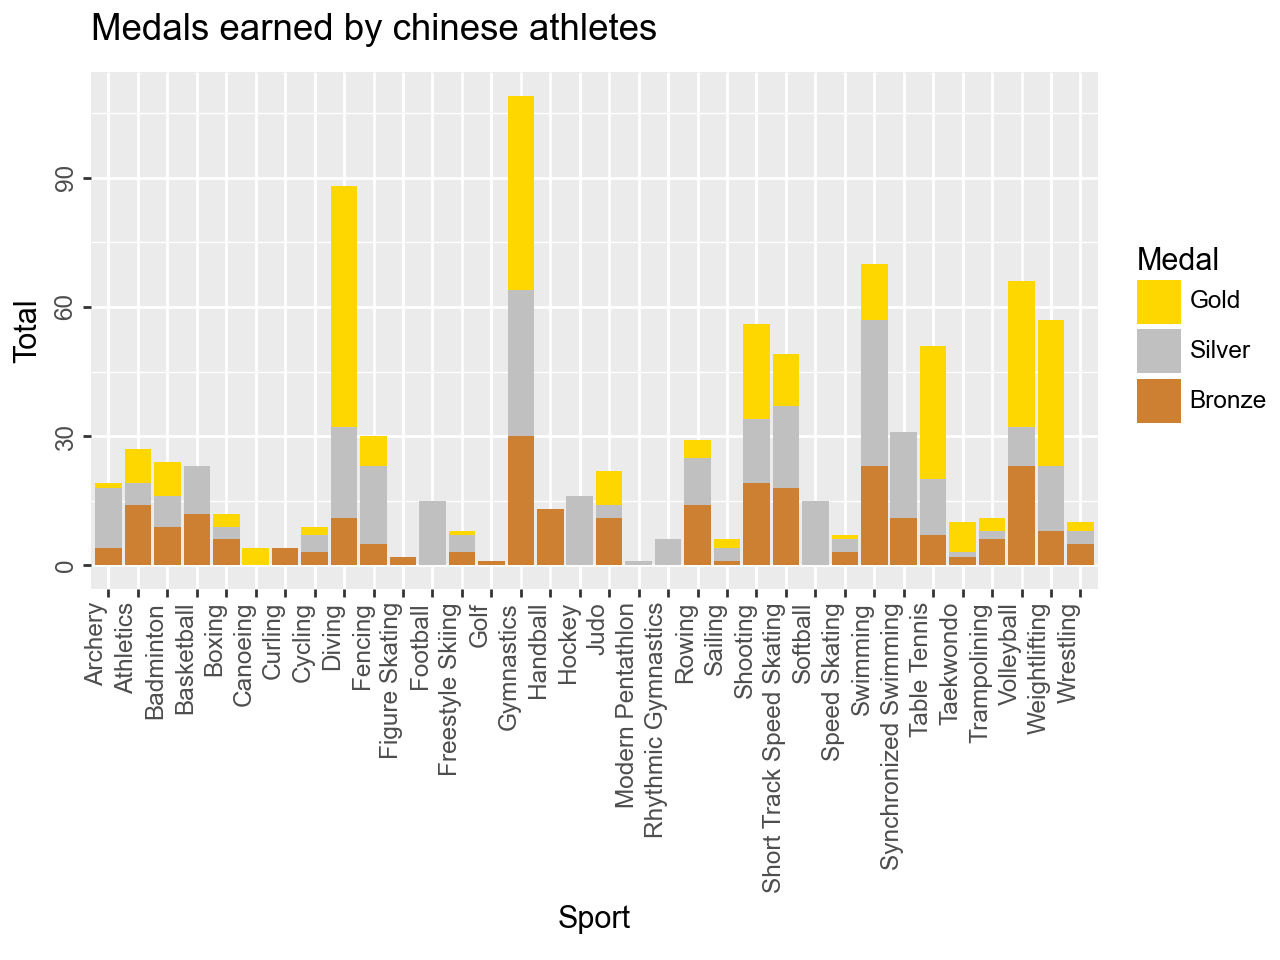

In [7]:
# Creamos el gráfico de barras
graph = (
        pn.ggplot(
            chinese_medals,
            pn.aes(**{"x": "Sport", "y": "Total", "fill": "Medal"}),
        )
        + pn.geom_col()
        + pn.ggtitle("Medals earned by chinese athletes")
        + pn.xlab("Sport")
        + pn.ylab("Total")
        + pn.scale_fill_manual(values={
    "Bronze": "#cd7f32",  # Bronze color
    "Gold": "#ffd700",  # Gold color
    "Silver": "#c0c0c0"  # Silver color
})
        + pn.theme(axis_text=pn.element_text(rotation=90, hjust=1))

)

# Mostramos el gráfico
graph.draw()